# Collecting the data

Collecting two types of data through the Binance API using a streaming architecture.

Thanks to this API, we can retrieve information on the prices of different markets (BTC-USDT, BTC-ETH, ...). The goal will be to create a generic data retrieval function in order to have data from any market. It will also be necessary to create a pre-processing script to reorganise the data coming out of the stream so that it is clean.

Recovering historical data, pre-processed to train our future model

In [5]:
#from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
from binance.client import Client
from binance.enums import *
from binance.exceptions import BinanceAPIException, BinanceOrderException
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import creds



client = Client(creds.api_key, creds.api_secret)

In [6]:
timestamp = client._get_earliest_valid_timestamp('BTCUSDT', '1d')
bars = client.get_historical_klines('BTCUSDT', '1d', timestamp, limit=1000)
for line in bars:
    del line[5:]
df = pd.DataFrame(bars, columns=['date', 'open', 'high', 'low', 'close'])
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index, unit = 'ms')

In [7]:
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)

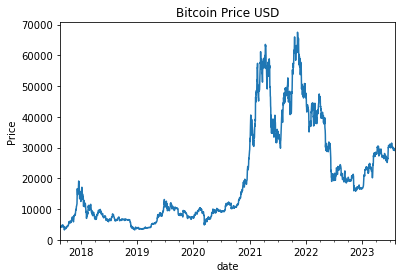

In [8]:
#df["close"].plot(title = 'Bitcoin Price USD', legend = 'close')

ax = df["close"].plot(title = 'Bitcoin Price USD')

plt.setp(ax,xlabel='date', ylabel='Price')
plt.rcParams["figure.figsize"] = (25,3)
plt.show()


In [9]:
x_date_sell = df["close"].idxmax()
x_date_sell


y_price_sell = df.loc[x_date_sell].close
y_price_sell

67525.83

In [10]:
x_date_buy = df['close'].idxmin()
y_price_buy = df.loc[x_date_buy].close
y_price_buy

3189.02

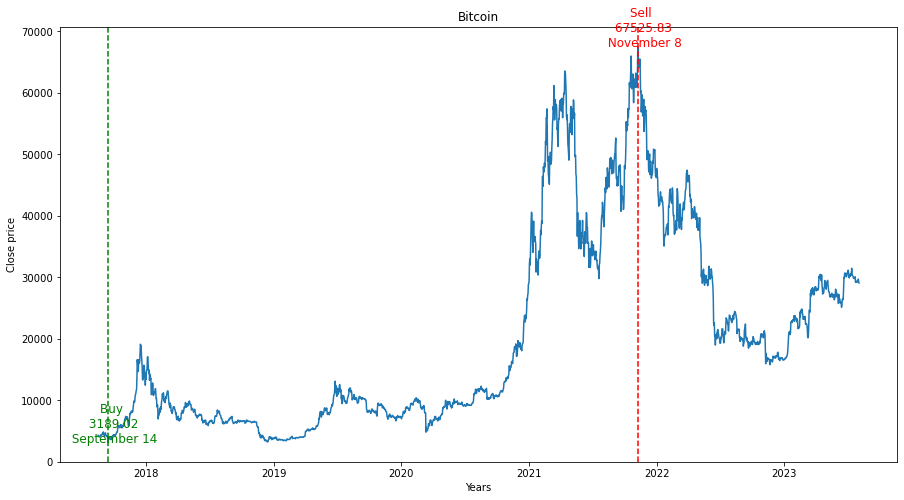

In [11]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=df.index, y=df.close)

show_date_sell = f'{x_date_sell.strftime("%B")} {x_date_sell.day}'
show_date_buy = f'{x_date_buy.strftime("%B")} {x_date_buy.day}'

plt.text(x_date_sell + timedelta(days=15), y_price_sell - 0.012, f'Sell \n {round(y_price_sell,2)} \n {show_date_sell}', fontsize=12, ha='center', color = 'red')
plt.text(x_date_buy + timedelta(days=15), y_price_buy, f'Buy \n {round(y_price_buy,2)} \n {show_date_buy}', fontsize=12, ha='center', color = 'green')

plt.axvline(x=x_date_buy, color='green', linestyle='--')
plt.axvline(x=x_date_sell, color='red', linestyle='--')
plt.xlabel('Years')
plt.ylabel('Close price')
plt.title('Bitcoin')
plt.show()